## Load ANN model and origin X

In [29]:
import pickle
with open("../Models/mlp.pickle", "rb") as fr:
    mlp = pickle.load(fr)
with open("../Data/abalone_X.pickle", "rb") as fr:
    X = pickle.load(fr)


## Generate new dataset

### Generate random dataset

In [30]:
import numpy as np
import pandas as pd

In [31]:
def generate_random_column(origin_column, type, num_of_lines):
    if (type == "catogorical"):
        elements = origin_column.drop_duplicates().values.tolist()
        result = np.random.choice(elements, size=num_of_lines)
    elif (type == "continuous"):
        result = np.random.uniform(low=origin_column.min(), high=origin_column.max(), size=num_of_lines)
    return pd.Series(result, name=origin_column.name)

In [32]:
num_of_random_instances = 2000

df = generate_random_column(X[1], "continuous", num_of_random_instances)

for i in range(2, 8):
    df = pd.concat([df, generate_random_column(X[i], "continuous", num_of_random_instances)], axis=1)

for i in ['A', 'B', 'C']:
    df = pd.concat([df, generate_random_column(X[i], "catogorical", num_of_random_instances)], axis=1)

### Concatenate X_origin and X_random into X_whole. Predict X_whole using ANN model.

In [33]:
X_random = df
X_whole = pd.concat([X, X_random], axis=0)
y_whole = mlp.predict(X_whole)

## Fit generated dataset into Decision Tree.

In [34]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [36]:
decision_tree_clf = DecisionTreeClassifier(random_state=1)
model = decision_tree_clf.fit(X_whole, y_whole)

## Extract Rules from Decision Tree.

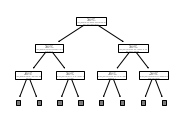

In [43]:
fig = plt.figure(figsize=(3,2))
_ =tree.plot_tree(decision_tree_clf, max_depth=2)